                 Final Project Description: Predicting Rain Tomorrow in Australia                                                              
Introduction: In this final project, you will explore the machine learning techniques bytackling a real-world problem: predicting whether it will rain tomorrow in various locations across Australia. Weather forecasting is a crucial application of machine learning, with far-reaching implications for agriculture, transportation, and public safety. By the end of this project, you will have built and evaluated several classification models, honing your skills in preprocessing, model selection, and interpretation of results.

Dataset Description: The dataset provided contains approximately 10 years of daily weather observations from multiple locations across Australia. Each observation includes various features such as temperature, humidity, wind speed, and rainfall. The target variable, RainTomorrow, indicates whether it rained the following day, with a binary classification of "Yes" or "No". Specifically, if the rainfall for a given day exceeds 1mm, RainTomorrow is labeled as "Yes"

# Data Loading and Preprocessing:

In [41]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.linalg import svd
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")


In [42]:
# load the weathers data set
X_train=pd.read_csv("weatherAUS_X_train.csv")
X_test=pd.read_csv("weatherAUS_X_test.csv")
Y_train=pd.read_csv("weatherAUS_y_train.csv")
Y_test=pd.read_csv("weatherAUS_y_test.csv")
print(X_train.shape, X_test.shape,Y_train.shape,Y_test.shape)

# drop non nummeric data colums both on trainning and test data
# convert yes/ no in to integers 
X_train_hs=X_train.copy()  # used for histogram 
X_train=X_train.drop(["Date","Location","WindGustDir","WindDir9am","WindDir3pm"],axis=1)
X_train['RainToday']=X_train['RainToday'].replace({'Yes': 1, 'No': 0})
Y_train=Y_train.replace({'Yes': 1, 'No': 0})


X_test=X_test.drop(["Date","Location","WindGustDir","WindDir9am","WindDir3pm"],axis=1)
X_test['RainToday']=X_test['RainToday'].replace({'Yes': 1, 'No': 0})
Y_test=Y_test.replace({'Yes': 1, 'No': 0})
print(X_train.head())

(116368, 22) (29092, 22) (116368, 1) (29092, 1)
   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     14.5     17.8      14.2          NaN       NaN            NaN   
1     24.6     39.5       0.0         12.0       NaN           31.0   
2     14.7     26.6       0.2          3.2       8.0           30.0   
3     18.3     26.6       0.0          NaN       NaN           28.0   
4     11.4     19.3       0.6          2.4       8.9           31.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.0           NaN         94.0          NaN       1024.1   
1           9.0          17.0         52.0         21.0       1011.8   
2           7.0          11.0         87.0         57.0       1018.2   
3          11.0          22.0         79.0         67.0       1017.0   
4          13.0          19.0         63.0         47.0       1018.6   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  
0       1022.5       8.0  

Perform exploratory data analysis (EDA) to gain insights into the dataset's structure and distributions.

In [43]:
# sum of nan values in each colums, we can do for other datasets as well
X_train.isnull().sum()
#X_test.isnull().sum()


MinTemp           1178
MaxTemp            998
Rainfall          2604
Evaporation      50329
Sunshine         55942
WindGustSpeed     8202
WindSpeed9am      1408
WindSpeed3pm      2457
Humidity9am       2117
Humidity3pm       3616
Pressure9am      12061
Pressure3pm      12042
Cloud9am         44757
Cloud3pm         47548
Temp9am           1405
Temp3pm           2897
RainToday         2604
dtype: int64

Handling missing values:

In [44]:
# use mean to handle NAN values 
from sklearn.impute import SimpleImputer

# use mean to handle missing value of X_train and Y_train
imputer= SimpleImputer(strategy='mean')
X_train=imputer.fit_transform(X_train)
X_train=pd.DataFrame(X_train)
imputation_value = Y_train.mode().iloc[0]
Y_train = Y_train.fillna(imputation_value)

#use mode to handle missing value of X_test and Y_test
X_test=imputer.fit_transform(X_test)
X_test=pd.DataFrame(X_test)
imputation_value_Y = Y_test.mode().iloc[0]
Y_test = Y_test.fillna(imputation_value_Y)
# check if there is nan vaues in each columns 
#Y_test.isnull().sum()   #  uncomment to see sum of nan columns
#Y_train.isnull().sum()
#X_test.isnull().sum()
X_train.isnull().sum()



0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

Vizualize the dataset using scatter plot for both training and test datasets

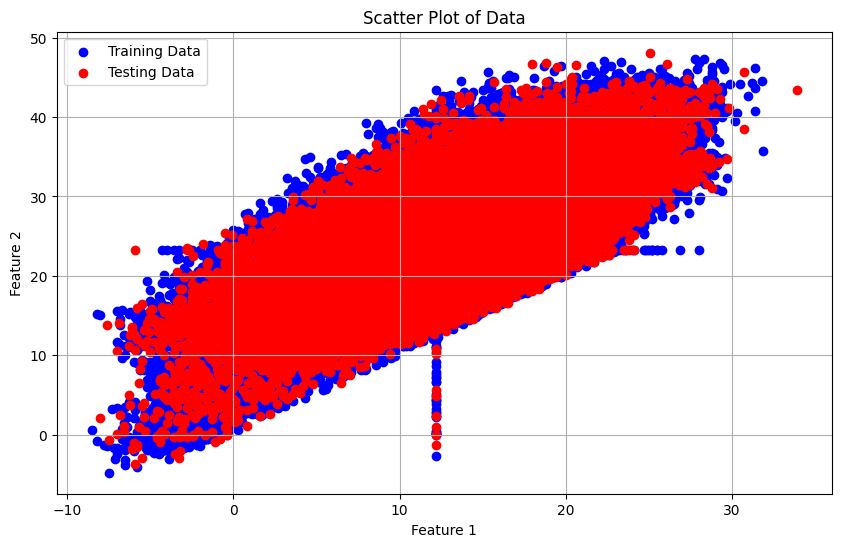

In [45]:

# Merge features and target variables
train_data = pd.concat([X_train, Y_train], axis=1)
test_data = pd.concat([X_test, Y_test], axis=1)

# Plot the data
plt.figure(figsize=(10, 6))
# Scatter plot for training data and test data
plt.scatter(train_data.iloc[:, 0], train_data.iloc[:, 1], c='blue', label='Training Data', marker='o')
plt.scatter(test_data.iloc[:, 0], test_data.iloc[:, 1], c='red', label='Testing Data', marker='o')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Data')
plt.legend()
plt.grid(True)
plt.show()



A histogram for the standard deviation of the average yearly Rainfall for X_train

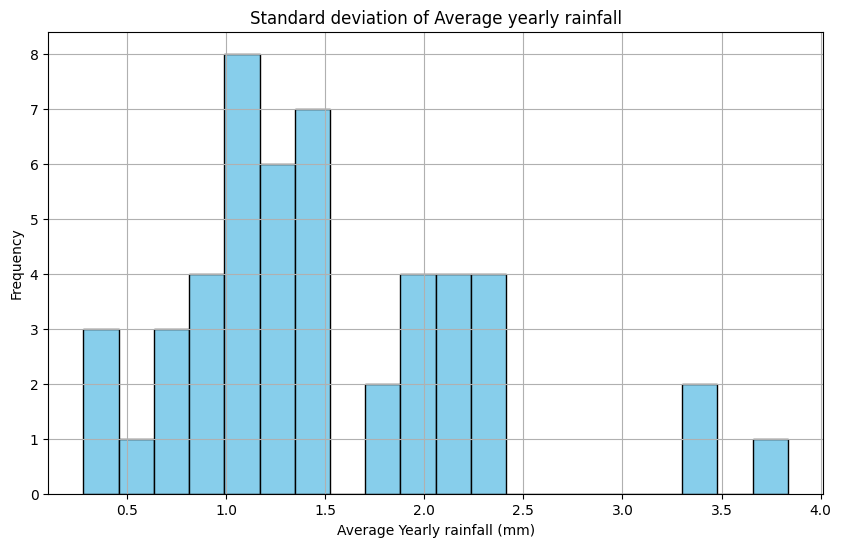

In [54]:
# Calculate yearly rainfall 
yearly_rainfall = X_train_hs.groupby(['Location'])['Rainfall'].sum()

# average yearly ranfall for each location
average_yearly_rainfall = yearly_rainfall / (365*10)   # 10 years of dataset is used 

# Calculate the standard deviation 
std_deviation = average_yearly_rainfall.std()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(average_yearly_rainfall,bins=20, color='skyblue', edgecolor='black')
plt.title('Standard deviation of Average yearly rainfall')
plt.xlabel('Average Yearly rainfall (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Scaling

In [47]:
# scale X train and test data
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
print(X_train)

[[ 3.61682695e-01 -7.64724900e-01  1.40039468e+00 ... -1.22795010e-01
  -5.18623291e-16  1.88239917e+00]
 [ 1.94792797e+00  2.29725511e+00 -2.81813785e-01 ...  2.03252765e+00
   2.55694305e+00 -5.43396697e-01]
 [ 3.93093493e-01  4.76999714e-01 -2.58120708e-01 ...  4.77700927e-02
   4.11044717e-01 -5.43396697e-01]
 ...
 [-7.21989822e-01 -2.14415128e-01 -2.81813785e-01 ... -5.10442972e-01
  -7.06875628e-02 -5.43396697e-01]
 [-5.33525036e-01 -1.18804011e+00 -2.81813785e-01 ... -4.48419298e-01
  -1.18013160e+00 -5.43396697e-01]
 [ 5.65852880e-01  2.45247069e+00 -2.81813785e-01 ...  2.03252765e+00
   1.78325182e+00 -5.43396697e-01]]


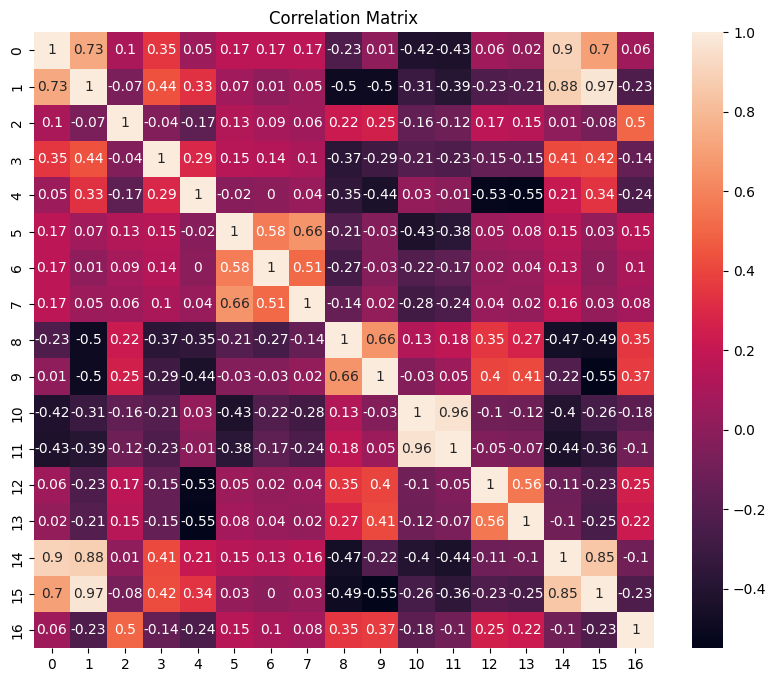

In [48]:
# Visualize correlation matrix
#use heatmap for more vissualization
X_train_df=pd.DataFrame(X_train)
correlation_matrix=X_train_df.corr()

# the color varations (Darker colors indicate stronger correlations, while lighter colors indicate weaker or no correlations)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.round(2), annot=True)
plt.title('Correlation Matrix')
plt.show()

Dimensionality Reduction using PCA

In [49]:
from sklearn.decomposition import PCA
import numpy as np

# Creating PCA decomposition object
pca = PCA()

# Fit PCA to the training data
pca.fit(X_train)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components to retain based on the threshold
threshold = 0.95
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print("Number of components to retain:", num_components)

# create a new PCA object with the determined number of components and fit it to the data
pca = PCA(n_components=num_components)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train)

Number of components to retain: 11
[[-1.76932535  0.63901664 -1.40158922 ... -0.73571679  0.01571199
   0.41786442]
 [ 5.04401784 -0.44582543 -1.98882522 ...  0.20313709 -0.66998858
   0.65562874]
 [-0.29391552 -0.54156487 -1.67595113 ... -0.12432681  1.2629705
   0.0858208 ]
 ...
 [-0.3270178  -2.15294834  0.49153544 ...  0.18986383 -0.1365051
  -0.01530139]
 [-0.19950232  3.38938406  1.62314945 ...  1.13632615 -0.7514199
   0.39679741]
 [ 4.97862045 -1.26634273 -1.05902037 ... -0.07610487  0.04617055
  -0.09701185]]


                                            Model Design and Training                                                                 

Implement various classification algorithms including Decision Trees, Support Vector Machines (SVM), Multi-layer Perceptron (MLP), Logistic Regression,Naïve Bayes and ensemble methods such as Bagging, AdaBoost, RandomForest or XGBoost (You can choose one ensemble method to implement).

• Train each model on the training dataset and evaluate their performance using appropriate metrics.

DecisionTree Classifier

Accuracy_train: 99.99226591502818
Accuracy_test: 76.57431596315138
classification report
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85     22672
         1.0       0.47      0.48      0.47      6420

    accuracy                           0.77     29092
   macro avg       0.66      0.66      0.66     29092
weighted avg       0.77      0.77      0.77     29092



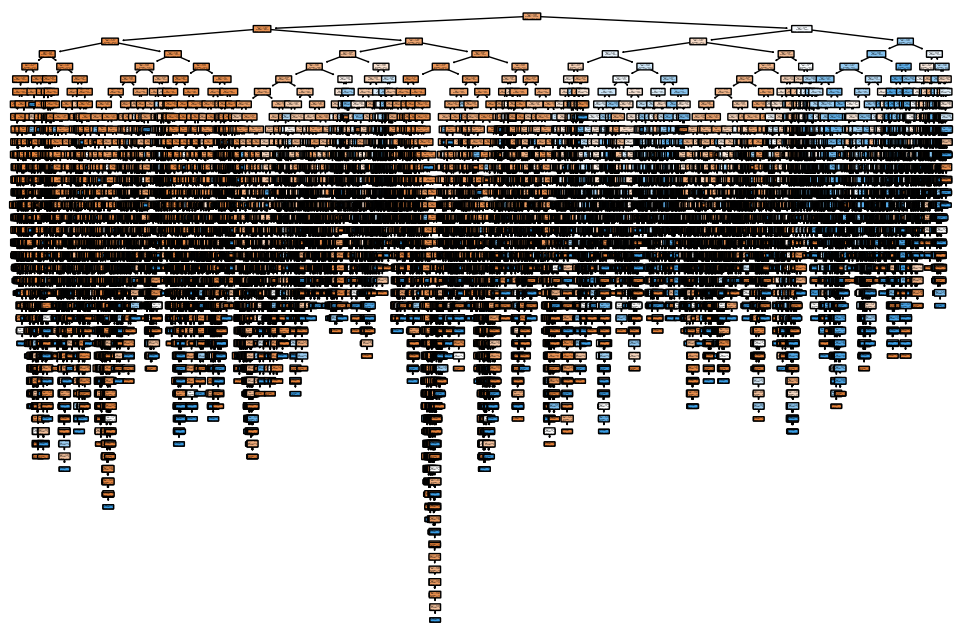

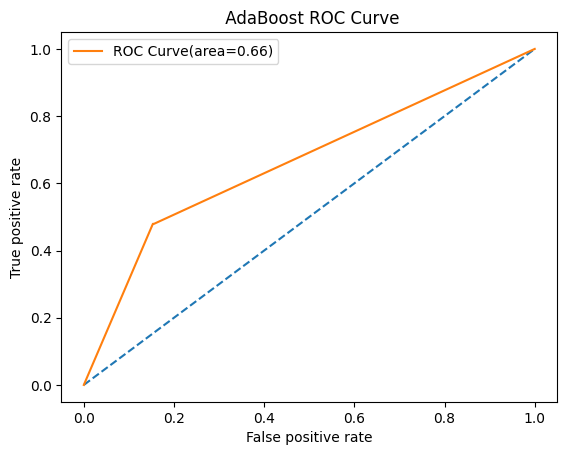

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# use copy of orrginal data to make independent for each modeles
X_train_DT=X_train.copy()
Y_train_DT=Y_train.copy()
X_test_DT=X_test.copy()
Y_test_DT=Y_test.copy()
# Train a decision tree classifier with default parameters
clf = DecisionTreeClassifier(random_state=1)
# train the model with traning set and predit the result for tranning set
clf = clf.fit(X_train_DT,Y_train_DT)
Y_pred_train = clf.predict(X_train_DT)
accuracy_train= accuracy_score(Y_train_DT, Y_pred_train)
print(f"Accuracy_train: {accuracy_train*100}")

# Evaluate the classifier on the testing set
Y_pred_test = clf.predict(X_test_DT)
accuracy_test=accuracy_score(Y_test_DT, Y_pred_test)
print(f"Accuracy_test: {accuracy_test*100}")
print("classification report")
print(classification_report(Y_test_DT,Y_pred_test))

# Visualize the learned tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=None, class_names=None, rounded=True)
plt.show()

# ROC curve
ns_probs = [0 for _ in range(len(Y_test_DT))]
lr_probs = clf.predict_proba(X_test_DT)
lr_probs=lr_probs[:,1]
FPR,TPR, _ =roc_curve(Y_test_DT,lr_probs)
FPR_random, TPR_random, _=roc_curve(Y_test_DT, ns_probs)
roc_auc = auc(FPR,TPR)

plt.plot(FPR_random, TPR_random, linestyle='--')
plt.plot(FPR, TPR, label=f"ROC Curve(area={roc_auc:.2f})")
plt.title(f" DecisionTree ROC Curve")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()


Decision tree Model improvements using post pruning

In [30]:
from joblib import Parallel, delayed
from sklearn.metrics import confusion_matrix, classification_report

# Define the decision tree classifier with a maximum depth
clf = DecisionTreeClassifier(max_depth=20, random_state=1)
path = clf.cost_complexity_pruning_path(X_train_DT, Y_train_DT)
ccp_alphas = path.ccp_alphas

# Define a function to train decision trees and calculate accuracy for a given ccp_alpha
def train_and_evaluate(ccp_alpha):
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=1)
    clf.fit(X_train_DT, Y_train_DT)
    Y_pred = clf.predict(X_test_DT)
    accuracy_pruned = accuracy_score(Y_pred, Y_test_DT)
    
    # Calculate confusion matrix and classification report
    cm = confusion_matrix(Y_test_DT, Y_pred)
    report = classification_report(Y_test_DT, Y_pred)
    
    return accuracy_pruned, cm, report

# calculate accuracy, confusion matrix, and classification report
results = Parallel(n_jobs=-1)(delayed(train_and_evaluate)(ccp_alpha) for ccp_alpha in ccp_alphas)

# Extract accuracies, confusion matrices, and classification reports
accuracy_scores, confusion_matrices, classification_reports = zip(*results)

# Get the maximum accuracy
max_accuracy = np.max(accuracy_scores)
print(f"Best Accuracy: {max_accuracy * 100}")

# Find the index of the maximum accuracy
best_index = accuracy_scores.index(max_accuracy)

# Print confusion matrix and classification report corresponding to the best accuracy
best_confusion_matrix = confusion_matrices[best_index]
best_classification_report = classification_reports[best_index]

print("Confusion Matrix:")
print(best_confusion_matrix)

print("\nClassification Report:")
print(best_classification_report)


Best Accuracy: 82.80626976488382
Confusion Matrix:
[[21541  1131]
 [ 3871  2549]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     22672
         1.0       0.69      0.40      0.50      6420

    accuracy                           0.83     29092
   macro avg       0.77      0.67      0.70     29092
weighted avg       0.81      0.83      0.81     29092



Naive Bayes classifier model

In [38]:
from sklearn.naive_bayes import GaussianNB
# copy the orginal data and train the model
X_train_NB=X_train.copy()
Y_train_NB=Y_train.copy()
X_test_NB=X_test.copy()
Y_test_NB=Y_test.copy()
gnb = GaussianNB()
gnb.fit(X_train_NB,Y_train_NB)
Y_test_pre=gnb.predict(X_test_NB)
print("Accuracy:", accuracy_score(Y_test_NB,Y_test_pre)*100)
print("classification report")
print(classification_report(Y_test_NB,Y_test_pre))

Accuracy: 80.34167468719923
classification report
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     22672
         1.0       0.57      0.46      0.51      6420

    accuracy                           0.80     29092
   macro avg       0.71      0.68      0.69     29092
weighted avg       0.79      0.80      0.80     29092



Naive bayes classification model improvement using feature selection and Hyperparameter Tuning using GridSearchCV

Accuracy: 82.24254090471608
classification report
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     22672
         1.0       0.67      0.39      0.49      6420

    accuracy                           0.82     29092
   macro avg       0.76      0.67      0.69     29092
weighted avg       0.81      0.82      0.80     29092

Confusion Matrix:
[[21415  1257]
 [ 3909  2511]]


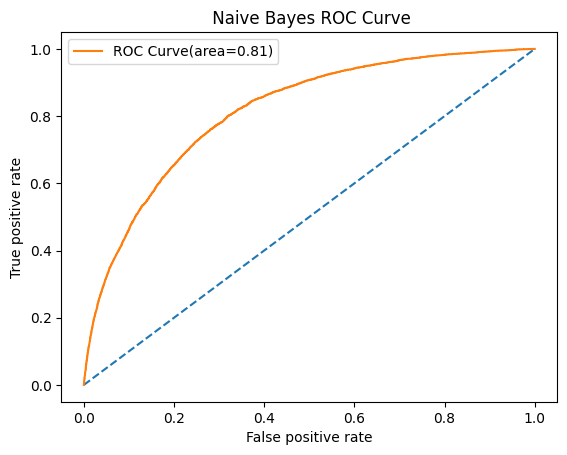

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Define Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Feature selection
k = 4
feature_selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = feature_selector.fit_transform(X_train_NB, Y_train_NB)
X_test_selected = feature_selector.transform(X_test_NB)

# Hyperparameter tuning
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}  # Extend the range of var_smoothing
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, Y_train_NB)
best_gnb = grid_search.best_estimator_

# Train the best model
best_gnb.fit(X_train_selected, Y_train_NB)

# Make predictions
Y_test_pred = best_gnb.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(Y_test_NB, Y_test_pred)
print("Accuracy:", accuracy * 100)
print("classification report")
print(classification_report(Y_test_NB,Y_test_pred))

confusionmatrix=confusion_matrix(Y_test_NB,Y_test_pred)
print("Confusion Matrix:")
print(confusionmatrix)

best_gnb.fit(X_train_NB, Y_train_NB)

ns_probs = [0 for _ in range(len(Y_test_NB))]
lr_probs = best_gnb.predict_proba(X_test_NB)
lr_probs=lr_probs[:,1]
FPR,TPR, _ =roc_curve(Y_test_NB,lr_probs)
FPR_random, TPR_random, _=roc_curve(Y_test_NB, ns_probs)
roc_auc = auc(FPR,TPR)

plt.plot(FPR_random, TPR_random, linestyle='--')
plt.plot(FPR, TPR, label=f"ROC Curve(area={roc_auc:.2f})")
plt.title(f" Naive Bayes ROC Curve")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()



SVM models 

SVM Accuracy: 83.89591640313489
classification report
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     22672
         1.0       0.75      0.40      0.53      6420

    accuracy                           0.84     29092
   macro avg       0.80      0.68      0.71     29092
weighted avg       0.83      0.84      0.82     29092



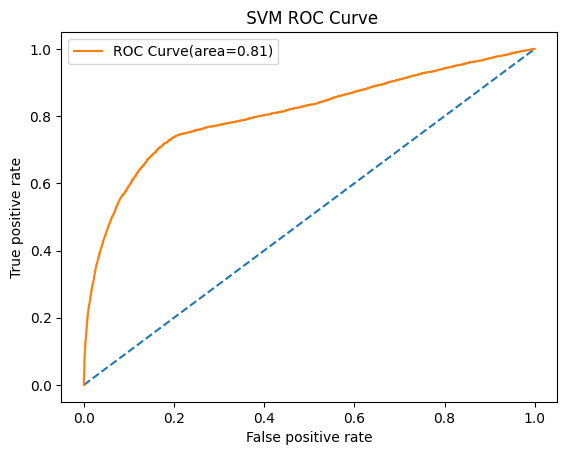

In [51]:
from sklearn.svm import SVC
# copy the orginal data and train the model
X_train_SVM=X_train.copy()
Y_train_SVM=Y_train.copy()
X_test_SVM=X_test.copy()
Y_test_SVM=Y_test.copy()

svc=SVC(kernel='rbf', probability=True)
svc.fit(X_train_SVM,Y_train_SVM)
Y_pred = svc.predict(X_test_SVM)
svm_accuracy=(accuracy_score(Y_test_SVM, Y_pred)*100)
print("SVM Accuracy:", svm_accuracy)
print("classification report")
print(classification_report(Y_test_SVM,Y_pred))

ns_probs = [0 for _ in range(len(Y_test_SVM))]
lr_probs = svc.predict_proba(X_test_SVM)
lr_probs=lr_probs[:,1]
FPR,TPR, _ =roc_curve(Y_test_SVM,lr_probs)
FPR_random, TPR_random, _=roc_curve(Y_test_SVM, ns_probs)
roc_auc = auc(FPR,TPR)

plt.plot(FPR_random, TPR_random, linestyle='--')
plt.plot(FPR, TPR, label=f"ROC Curve(area={roc_auc:.2f})")
plt.title(f" SVM ROC Curve")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()

SVM model improvement by Hyperparameter Tuning using RandomizedSearchCV

In [59]:
from sklearn.model_selection import RandomizedSearchCV
# Define parameter distributions for RandomizedSearchCV
param_distributions = {'C': np.logspace(-3, 2, 6)}

# Initialize SVM model with RBF kernel
svc_rbf = SVC(kernel='rbf', random_state=42)
# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=svc_rbf, param_distributions=param_distributions, n_iter=5, cv=3, n_jobs=-1)
random_search.fit(X_train_SVM, Y_train_SVM)

# Get the best SVM model
best_svc = random_search.best_estimator_

# Make predictions on the test set
Y_pred_best = best_svc.predict(X_test_SVM)

# Calculate accuracy
svm_accuracy_best = accuracy_score(Y_test_SVM, Y_pred_best) * 100
print("Accuracy:", svm_accuracy_best)

# Print classification report
print("Classification Report")
print(classification_report(Y_test_SVM, Y_pred_best))
confusionmatrix=confusion_matrix(Y_test_SVM,Y_pred_best)
print("Confusion Matrix:")
print(confusionmatrix)

Accuracy: 84.00591227828956
Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     22672
         1.0       0.75      0.42      0.54      6420

    accuracy                           0.84     29092
   macro avg       0.80      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092

Confusion Matrix:
[[21753   919]
 [ 3734  2686]]


Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
# copy the orginal data and train the model
X_train_LB=X_train.copy()
Y_train_LB=Y_train.copy()
X_test_LB=X_test.copy()
Y_test_LB=Y_test.copy()
LB_model=LogisticRegression()
LB_model=LB_model.fit(X_train_LB,Y_train_LB)

Y_pre_test=LB_model.predict(X_test)
print(f"Accuracy Test:{(accuracy_score(Y_test_LB,Y_pre_test))*100}")
print("classification report")
print(classification_report(Y_test_LB,Y_pre_test))

Accuracy Test:83.38718548054447
classification report
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     22672
         1.0       0.70      0.44      0.54      6420

    accuracy                           0.83     29092
   macro avg       0.78      0.69      0.72     29092
weighted avg       0.82      0.83      0.82     29092



Hyperparameter Tuning using GridSearchCV on Logistic Regression

Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Test Data: 83.39062285164306
classification report
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     22672
         1.0       0.70      0.44      0.54      6420

    accuracy                           0.83     29092
   macro avg       0.78      0.69      0.72     29092
weighted avg       0.82      0.83      0.82     29092

Confusion Matrix:
[[21435  1237]
 [ 3595  2825]]


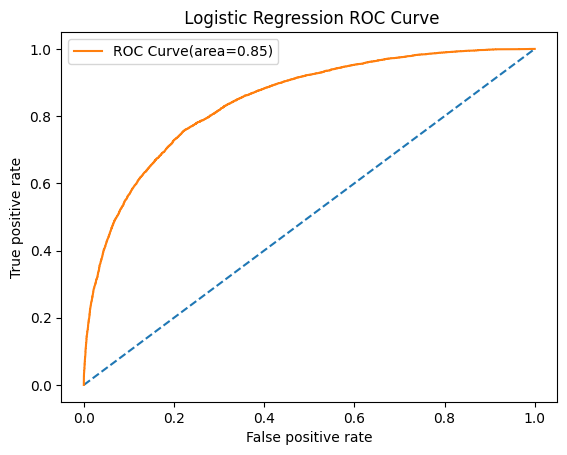

In [16]:
from sklearn.model_selection import GridSearchCV
# Define the Logistic Regression model
LR_model = LogisticRegression()

# Define hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],               # Penalty term
    'solver': ['liblinear'],                # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}
# Perform Grid Search
grid_search = GridSearchCV(estimator=LR_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_LB, Y_train_LB)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_LR_model = grid_search.best_estimator_

# Evaluate the model on test data
Y_pred_test = best_LR_model.predict(X_test_LB)
test_accuracy = accuracy_score(Y_test_LB, Y_pred_test)
print("Accuracy on Test Data:", test_accuracy * 100)
print("classification report")
print(classification_report(Y_test_LB,Y_pred_test))

confusionmatrix=confusion_matrix(Y_test_LB,Y_pred_test)
print("Confusion Matrix:")
print(confusionmatrix)


ns_probs = [0 for _ in range(len(Y_test_LB))]
lr_probs = best_LR_model.predict_proba(X_test_LB)
lr_probs=lr_probs[:,1]
FPR,TPR, _ =roc_curve(Y_test_LB,lr_probs)
FPR_random, TPR_random, _=roc_curve(Y_test_LB, ns_probs)
roc_auc = auc(FPR,TPR)

plt.plot(FPR_random, TPR_random, linestyle='--')
plt.plot(FPR, TPR, label=f"ROC Curve(area={roc_auc:.2f})")
plt.title(f" Logistic Regression ROC Curve")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()


Multi-layer Perceptron (MLP)

In [59]:
from sklearn.neural_network import MLPClassifier
# copy the orginal data and train the model
X_train_MLP=X_train.copy()
Y_train_MLP=Y_train.copy()
X_test_MLP=X_test.copy()
Y_test_MLP=Y_test.copy()
mlp_model=MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_model=mlp_model.fit(X_train_MLP,Y_train_MLP)

Y_pre_test=mlp_model.predict(X_test_MLP)
print(f"Accuracy Test:{(accuracy_score(Y_test_MLP,Y_pre_test))*100}")
print("classification report")
print(classification_report(Y_test_MLP,Y_pre_test))


Accuracy Test:83.9784133095009
classification report
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     22672
         1.0       0.69      0.50      0.58      6420

    accuracy                           0.84     29092
   macro avg       0.78      0.72      0.74     29092
weighted avg       0.83      0.84      0.83     29092



Hyperparameter Tuning using GridSearchCV on MLP

Training Accuracy: 85.00790595352674
Test Accuracy: 84.23965351299326
Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'max_iter': 200, 'solver': 'adam'}
classification report
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     22672
         1.0       0.69      0.51      0.59      6420

    accuracy                           0.84     29092
   macro avg       0.78      0.72      0.75     29092
weighted avg       0.83      0.84      0.83     29092

Confusion Matrix:
[[21232  1440]
 [ 3145  3275]]


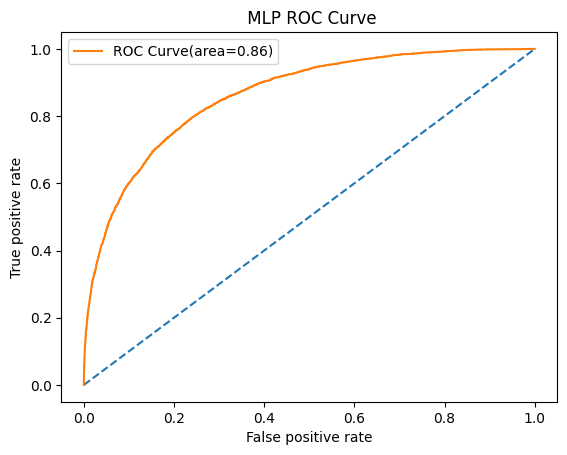

In [60]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300]
}

# Create MLP classifier
mlp_classifier = MLPClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_MLP, Y_train_MLP)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_mlp_model = grid_search.best_estimator_

# Accuracy of the best model on training data
Y_train_pred = best_mlp_model.predict(X_train_MLP)
train_accuracy = accuracy_score(Y_train_MLP, Y_train_pred)
print(f"Training Accuracy: {(train_accuracy)*100}")

# Accuracy of the best model on test data
Y_test_pred = best_mlp_model.predict(X_test_MLP)
test_accuracy = accuracy_score(Y_test_MLP, Y_test_pred)
print(f"Test Accuracy: {(test_accuracy)*100}")

# Print the best parameters found by GridSearchCV
print("Best Parameters:", best_params)
print("classification report")
print(classification_report(Y_test_MLP,Y_test_pred))

confusionmatrix=confusion_matrix(Y_test_MLP,Y_test_pred)
print("Confusion Matrix:")
print(confusionmatrix)



ns_probs = [0 for _ in range(len(Y_test_MLP))]
lr_probs = grid_search.predict_proba(X_test_MLP)
lr_probs=lr_probs[:,1]
FPR,TPR, _ =roc_curve(Y_test_MLP,lr_probs)
FPR_random, TPR_random, _=roc_curve(Y_test_MLP, ns_probs)
roc_auc = auc(FPR,TPR)

plt.plot(FPR_random, TPR_random, linestyle='--')
plt.plot(FPR, TPR, label=f"ROC Curve(area={roc_auc:.2f})")
plt.title(f" MLP ROC Curve")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()


 Ensemble methods using AdaBoost

In [12]:
from sklearn.ensemble import AdaBoostClassifier
# copy the orginal data and train the model
X_train_Ada=X_train.copy()
Y_train_Ada=Y_train.copy()
X_test_Ada=X_test.copy()
Y_test_Ada=Y_test.copy()
AdaBoost_classifier=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
AdaBoost_classifier.fit(X_train_Ada, Y_train_Ada)
#calculate accuracy
Y_pred_Ada = AdaBoost_classifier.predict(X_test_Ada)
print(f"Accuracy (Test):{(accuracy_score(Y_test_Ada,Y_pred_Ada))*100}")

print("Classification Report:")
print(classification_report(Y_test_Ada,Y_pred_Ada))

Accuracy (Test):83.20844218341811
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     22672
         1.0       0.68      0.45      0.54      6420

    accuracy                           0.83     29092
   macro avg       0.77      0.70      0.72     29092
weighted avg       0.82      0.83      0.82     29092



Hyperparameter Tuning using GridSearchCV on ada_boost

Accuracy (after hyperparameter tuning): 83.45249553141757
classification report
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     22672
         1.0       0.69      0.45      0.55      6420

    accuracy                           0.83     29092
   macro avg       0.77      0.70      0.72     29092
weighted avg       0.82      0.83      0.82     29092

Confusion Matrix:
[[21358  1314]
 [ 3500  2920]]


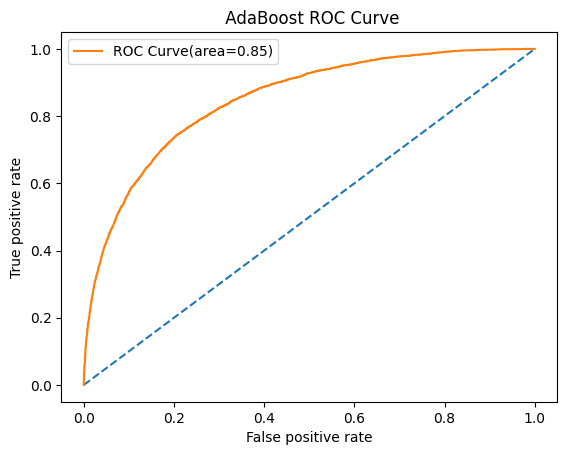

In [13]:
from sklearn.model_selection import GridSearchCV
# Define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Define the AdaBoostClassifier
ada_boost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of estimators (trees) in the ensemble
    'learning_rate': [0.1, 0.5, 1.0]  # Learning rate
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_Ada, Y_train_Ada)

# Get the best estimator from the grid search
best_ada_boost = grid_search.best_estimator_

# Make predictions on the test set
Y_test_pred = best_ada_boost.predict(X_test_Ada)
test_accuracy = accuracy_score(Y_test_Ada, Y_test_pred)
print("Accuracy (after hyperparameter tuning):", test_accuracy*100)
print("classification report")
print(classification_report(Y_test_Ada,Y_test_pred))


confusionmatrix=confusion_matrix(Y_test_Ada,Y_test_pred)
print("Confusion Matrix:")
print(confusionmatrix)


ns_probs = [0 for _ in range(len(Y_test_Ada))]
lr_probs = best_ada_boost.predict_proba(X_test_Ada)
lr_probs=lr_probs[:,1]
FPR,TPR, _ =roc_curve(Y_test_Ada,lr_probs)
FPR_random, TPR_random, _=roc_curve(Y_test_Ada, ns_probs)
roc_auc = auc(FPR,TPR)

plt.plot(FPR_random, TPR_random, linestyle='--')
plt.plot(FPR, TPR, label=f"ROC Curve(area={roc_auc:.2f})")
plt.title(f" AdaBoost ROC Curve")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()
